In [2]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

In [3]:
import numpy as np
import pandas as pd

# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

(n_samples, n_features) = df.shape
print('n_samples ', n_samples)
print('n_features ', n_features)

n_samples  506
n_features  13


y.shape  (506,)
w  [ 1.32118390e-01 -9.12752526e-17]  dw  [-1.25164790e+00  7.58286714e-16]
loss  0.9081301633616464


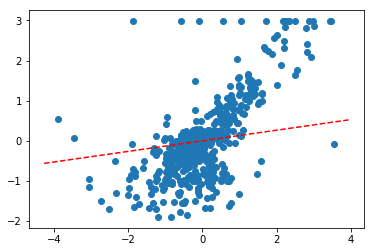

w  [ 6.95344987e-01 -4.73227079e-16]  dw  [-3.32455193e-05  5.61693862e-17]
loss  0.516474544284982


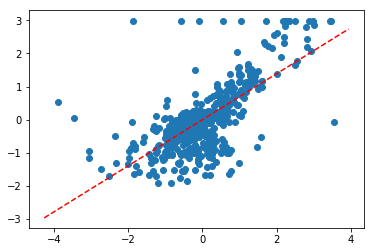

w  [ 6.95359947e-01 -4.76035548e-16]  dw  [-8.83047553e-10  8.42540793e-17]
loss  0.5164745440086659


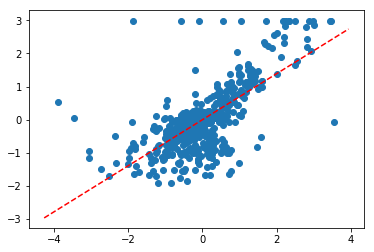

w  [ 6.95359947e-01 -4.94290599e-16]  dw  [-2.36859281e-14 -5.61693862e-17]
loss  0.5164745440086659


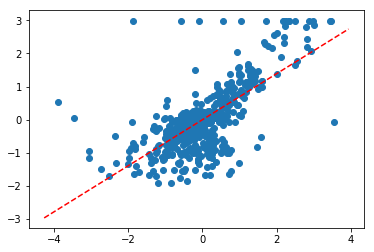

w  [ 6.95359947e-01 -5.26587996e-16]  dw  [-9.82964259e-16 -2.80846931e-17]
loss  0.5164745440086659


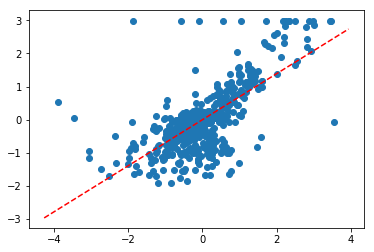

In [79]:
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import random
%matplotlib inline

#X = df["RM"].values
n_features = 1
X = df["RM"].values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0) # normalize
X = np.c_[ X, np.ones(n_samples) ] # append a column of 1s as bias multiplier

y = target["MEDV"].values
y = (y - np.mean(y, axis=0)) / np.std(y, axis=0) # normalize
print('y.shape ', y.shape)

w = np.zeros(n_features + 1)
alpha = 0.05

epochs = 500
for epoch in np.arange(epochs):
    y_hat = X @ w.transpose()
    error = y - y_hat
    dw = -2 * (error @ X) / n_samples
    w = w - alpha * dw

    if (epoch - 1) % int(epochs/5) == 0:
        print('w ', w, ' dw ', dw)

        loss = np.mean(error ** 2)
        print('loss ', loss)

        plt.figure()
        plt.scatter(X[:, 0], y)
        
        axes = plt.gca()
        x_vals = np.array(axes.get_xlim()) 
        y_vals = w[-1] + w[0] * x_vals #the line equation
        plt.plot(x_vals, y_vals, '--r')

        plt.show()